<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Software-and-conventions" data-toc-modified-id="Software-and-conventions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Software and conventions</a></span></li></ul></li><li><span><a href="#Constructing-a-simulation-with-a-prepared-domain" data-toc-modified-id="Constructing-a-simulation-with-a-prepared-domain-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Constructing a simulation with a prepared domain</a></span></li><li><span><a href="#A-WRF-Hydro-model" data-toc-modified-id="A-WRF-Hydro-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A WRF-Hydro model</a></span></li><li><span><a href="#A-WRF-Hydro-domain" data-toc-modified-id="A-WRF-Hydro-domain-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A WRF-Hydro domain</a></span><ul class="toc-item"><li><span><a href="#Orientation-to-the-DOMAIN-directory" data-toc-modified-id="Orientation-to-the-DOMAIN-directory-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Orientation to the <code>DOMAIN</code> directory</a></span></li><li><span><a href="#FORCING" data-toc-modified-id="FORCING-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>FORCING</a></span></li><li><span><a href="#The-Gridded-configuration-directory" data-toc-modified-id="The-Gridded-configuration-directory-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>The Gridded configuration directory</a></span></li><li><span><a href="#Namelists" data-toc-modified-id="Namelists-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Namelists</a></span></li><li><span><a href="#Creating-a-simulation-directory" data-toc-modified-id="Creating-a-simulation-directory-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Creating a simulation directory</a></span></li></ul></li><li><span><a href="#Running-WRF-Hydro-using-default-run-time-options" data-toc-modified-id="Running-WRF-Hydro-using-default-run-time-options-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running WRF-Hydro using default run-time options</a></span></li></ul></div>

# Lesson 2 - Running WRF-Hydro
## Overview
In this lesson, we will cover the basics of constructing and running a WRF-Hydro simulation using a prepared domain for the 'Gridded' configuration. For a detailed description of model configurations see the [Technical Description](link). 

### Software and conventions
The easiest way to run these lessons is via the [wrfhydro/training](https://hub.docker.com/r/wrfhydro/training/) Docker container, which has all software dependencies and data pre-installed.

For a complete description of the software environment used for this training please see [Getting started]().

You may either execute commands by running each cell of this notebook. Alternatively, you may open a terminal in Jupyter Lab by selecting `New -> Terminal` in your `Home` tab of Jupyter Lab and input the commands manually if you prefer. 

All paths used in this lesson assume that the lesson materials are located under your home directory in a folder named `wrf-hydro-training`. If your materials are located in another directory, you will not be able to run the commands in this notebook inside Jupyter and will need to type them manually in your terminal session. 

## Constructing a simulation with a prepared domain
In this section we will describe the main files needed to run a WRF-Hydro simulation. 

A WRF-Hydro simulation consists of two major functional elements, a *model* and a *domain*. Each of these major functional elements are comprised of many smaller functional elements and their respective files. Before we attempt to run a WRF-Hydro simulation, it is important to understand what comprises these elements and conceptualize how they interact.

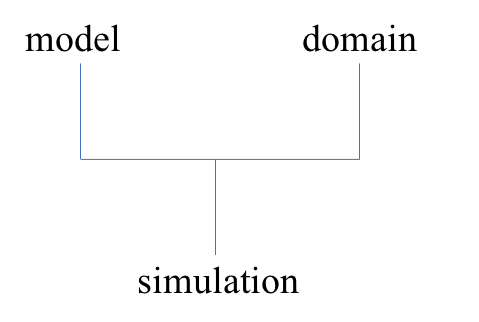

We will only cover basic descriptions of these elements in this lesson, for a detailed description see the [Technical Description](link).

## A WRF-Hydro model
For the purposes of this lesson, we will conceptualize a *model* of being comprised of a compiled WRF-Hydro binary (see Lesson 1 of this tutorial) and requisite supporting files. **If you have not already completed lesson 1, please stop and do so now**

In the most basic sense, a *model* consists of everything contained in the `trunk/NDHMS/Run` directory. These contents need to be associated with a *domain*, which then constitutes a simulation. This association is done primarily through specifications in the two namelist files `hydro.namelist` and `namelist.hrldas`. These namelist files contain file path specifications, simulation duration, and physics options, among other things. We will cover all of these options in more depth in Lesson 4.   

## A WRF-Hydro domain
### Orientation to the `DOMAIN` directory
This lesson will be using a prepared domain located in the `~/wrf-hydro-training/DOMAIN` directory. The structure of this directory serves as a good example of how you should organize your domain files. If using another domain with this lesson, such as one you may have created in the `Geospatial processing` tutorial, it is **imperative** that the file names and directory structure match that described below.

If using an official WRF-Hydro training domain, there will be a Readme.txt file that describes the directory and files.

Lets view the Readme.txt included with the domain for a brief description of the domain and its file contents.

In [21]:
%%bash
cat ~/mount/wrf-hydro-training/DOMAIN/Readme.txt

#Overview This test case includes prepared geospatial data and input files for a
sample domain (region of interest) and prepared forcing data. The forcing data
prepared for this test case is North American Land Data Assimilation System
(NLDAS) hourly data. This domain is a small region encompassing the West Branch
of the Croton River, NY, USA (USGS stream gage 0137462010) during  hurricane
Irene, 2011-08-26 to 2011-09-02.  The simulation begins with a restart from a
spinup period from 2010-10-01 to 2011-08-26.  There are 3 basic routing
configurations included in the test case, National Water Model (NWM), Gridded,
and NCAR Reach. See the WRF-Hydro V5 Technical Description located at
https://ral.ucar.edu/projects/wrf_hydro for a more detailed description of model
physics options, configurations, and input files. However, some non-standard
files will be described below.

For instructions on how to set up and run this test case see the Test Case User
Guide available from https://ral.ucar.

Now lets take a look at the actual directory

In [22]:
ls ~/mount/wrf-hydro-training/DOMAIN

FORCING/  Reach/        namelist_patches.json*
Gridded/  Readme.txt    study_map.PNG*
NWM/      USGS_obs.csv  supplimental_forcing.tar.gz*


There are 3 main routing configurations for WRF-Hydro, *National Water Model (NWM)*, *Gridded*, and *Reach*. These three routing configurations have different geospatial data associated with them, and thus are represented by 3 separate directories in the `~/wrf-hydro-training/DOMAIN` directory. 

### FORCING
This directory contains all the forcing data for our simulation, in this case 1 week of hourly NLDAS hrldas forcing data. Note that there is only 1 `FORCING` directory. The same forcing data can be used with all three configurations.

### The Gridded configuration directory
For this lesson, we will be running the *Gridded* configuration. Now we will explore the `~/wrf-hydro-training/DOMAIN/Gridded` directory.

In [23]:
ls ~/mount/wrf-hydro-training/DOMAIN/Gridded

DOMAIN/            croton_frxst_pts_csv.csv  namelist.hrldas_NO_LAKES*
DOMAIN_NO_LAKES/   hydro.namelist*           referenceSim/
RESTART/           hydro.namelist_NO_LAKES*  referenceSim_NO_LAKES/
RESTART_NO_LAKES/  namelist.hrldas*


The contents of this directory are described briefly in the `Readme.txt` file that we viewed earlier, but we will discuss them again here. 

For a more detailed description of these files beyond what will be described below, see the [Technical Description]()

**DOMAIN**: Directory containing all geospatial data and input files for
the Gridded routing option with lakes included

In [24]:
ls ~/mount/wrf-hydro-training/DOMAIN/Gridded/DOMAIN

Fulldom_hires.nc*                     gw_basns_geogrid.prj*
GEOGRID_LDASOUT_Spatial_Metadata.nc*  gw_basns_geogrid.txt*
GWBASINS.nc*                          hydro2dtbl.nc*
GWBUCKPARM.nc*                        lake_shapes/
LAKEPARM.nc*                          soil_properties.nc*
geo_em_d01.nc*                        wrfinput_d01.nc*


| Filename | Description | Source | Required |
| ------------- | ------------- | ------------- | ------------- |
| Fulldom_hires.nc | High resolution full domain file. Includes all fields specified on the routing grid. | WRF-Hydro GIS pre-processing toolkit | Yes |
| GWBASINS.nc | 2D file defining the locations of groundwater basins on a grid | WRF-Hydro GIS pre-processing toolkit | When the baseflow bucket model is turned on and user defined mapping is off |
| GWBUCKPARM.nc | Groundwater parameter table containing bucket model parameters for each basin | WRF-Hydro GIS pre-processing toolkit | When the baseflow bucket model is turned on |
| LAKEPARM.nc | Lake parameter table containing lake model parameters for each catchment | WRF-Hydro GIS pre-processing toolkit | When lake and reservoir routing is turned on |
| hydro2dtbl.nc | Spatially distributed parameter table for lateral flow routing within WRF-Hydro. | create_SoilProperties.R script (will also be automatically generated by WRF-Hydro) | When using spatially distributed terrain routing parameters |
| geo_em_d01.nc | The data required to define the domain and geospatial attributes of a spatially-distributed, or gridded, 1-dimensional (vertical) land surface model (LSM) | GEOGRID utility in the WRF preprocessing system (WPS) | Yes |
| wrfinput_d01.nc | file including all necessary fields for the Noah-MP land surface model, but with spatially uniform initial conditions. Users should be aware that the model will likely require additional spin-up time when initialized from this file. | create_Wrfinput.R script | Yes |
| soil_properties.nc | Spatially distributed land surface model parameters | create_SoilProperties.R script | If SPATIAL_SOIL compile-time option set to 1 |
| GEOGRID_LDASOUT_Spatial_Metadata.nc | projection and coordinate information for the land surface model grid. | WRF-Hydro GIS pre-processing toolkit | NO, but allows for CF compliant outputs |
| gw_basns_geogrid.prj | supplimental arcGIS file used for domain creation | arcGIS | NO |
| gw_basns_geogrid.txt | supplimental arcGIS file used for domain creation | arcGIS | NO |
| lake_shapes/ | supplimental shape files that define lakes | arcGIS | NO |



**DOMAIN_NO_LAKES**: Directory containing all geospatial data and input
files for the Gridded routing option without lakes. Note that Gridded
routing is the only configuration that requires separate geospatial data
for running with or without lakes.

**RESTART**: Directory containing model restart files for the Gridded 
routing option with lakes included.

In [25]:
ls ~/mount/wrf-hydro-training/DOMAIN/Gridded/RESTART

HYDRO_RST.2011-08-26_00_00_DOMAIN1*  RESTART.2011082600_DOMAIN1*


Restart files are an essential part of the WRF-Hydro modeling system. They are output on a fixed timestep specified by the user in the `namelist.hrldas` and `hydro.namelist` files, and represent a complete 'snapshot' of the model state at that time. These files can be used to restart a WRF-Hydro simulation from where the previous simulation terminated with all the model states intact.

When running a WRF-Hydro simulation, you may start your simulation with prescribed, artificial initial conditions, referred to as a 'cold start'. When starting from a cold start, a model spinup period is needed to move the model state away from the artificial initial condition to a more realistic, physically-based model state. Model output from the spinup period is generally not used for interpretation as the results are biased by the prescribed initial condition. 

Restart files output at the end the spinup period can be used as the initial conditions for subsequent simulations, referred to as a 'warm start'. Simulations that start from a 'warm start' are generally the primary target for interpretation.

### Namelists
Namelists are another key component of WRF-Hydro and are the primary means of specifying inputs, outputs, and run-time options. There are two namelist files used by WRF-Hydro: `hydro.namelist` for the routing and hydrologic model and `namelist.hrldas` for the land-surface model. **NOTE: These filenames are hard-coded into the model and can not be changed.**

For all official WRF-Hydro domains, namelists will be included with each of the three domain configurations. This is done so that a user can easily run each configuration with minimal setup, and they serve as a starting point for users to specify their own namelists for a given configuration. However, namelists files are typically not considered part of the *model* or the *domain* but rather serve to join a model to a domain and parameterize a *simulation*. In other words, the namelists construct a *simulation* from a *model* and a *domain*. 

There are different namelists for each configuration because certain namelists options are specific to the domain configuration used. We will cover the various namelist options in detail in lesson 4, but for now we will simply view the namelist and use the default namelist provided with the Gridded configuration to construct our simulation.  

Take a moment and read through the two namelists below and note how all filepaths are relative to the current directory containing the namelist. This is the recommended way of specifying filepaths.

In [26]:
%%bash
cat /home/docker/mount/wrf-hydro-training/DOMAIN/Gridded/hydro.namelist

&HYDRO_nlist
!!!! ---------------------- SYSTEM COUPLING ----------------------- !!!!

! Specify what is being coupled:  1=HRLDAS (offline Noah-LSM), 2=WRF, 3=NASA/LIS, 4=CLM
sys_cpl = 1

!!!! ------------------- MODEL INPUT DATA FILES ------------------- !!!!

! Specify land surface model gridded input data file (e.g.: "geo_em.d03.nc")
GEO_STATIC_FLNM = "./DOMAIN/geo_em_d01.nc"

! Specify the high-resolution routing terrain input data file (e.g.: "Fulldom_hires.nc")
GEO_FINEGRID_FLNM = "./DOMAIN/Fulldom_hires.nc"

! Specify the spatial hydro parameters file (e.g.: "hydro2dtbl.nc")
! If you specify a filename and the file does not exist, it will be created for you.
HYDROTBL_F = "./DOMAIN/hydro2dtbl.nc"

! Specify spatial metadata file for land surface grid. (e.g.: "GEOGRID_LDASOUT_Spatial_Metadata.nc")
LAND_SPATIAL_META_FLNM = "./DOMAIN/GEOGRID_LDASOUT_Spatial_Metadata.nc"

! Specify the name of the restart file if starting from restart...comment out with '!' if not...
RESTART_FILE  = 

In [27]:
%%bash
cat /home/docker/mount/wrf-hydro-training/DOMAIN/Gridded/namelist.hrldas

&NOAHLSM_OFFLINE

HRLDAS_SETUP_FILE = "./DOMAIN/wrfinput_d01.nc"
INDIR = "./FORCING"
SPATIAL_FILENAME = "./DOMAIN/soil_properties.nc"
OUTDIR = "./"

START_YEAR  = 2011
START_MONTH = 08
START_DAY   = 26
START_HOUR  = 00
START_MIN   = 00

RESTART_FILENAME_REQUESTED = "RESTART/RESTART.2011082600_DOMAIN1"

KDAY = 7
! KHOUR = 8

DYNAMIC_VEG_OPTION                = 4
CANOPY_STOMATAL_RESISTANCE_OPTION = 1
BTR_OPTION                        = 1
RUNOFF_OPTION                     = 3
SURFACE_DRAG_OPTION               = 1
FROZEN_SOIL_OPTION                = 1
SUPERCOOLED_WATER_OPTION          = 1
RADIATIVE_TRANSFER_OPTION         = 3
SNOW_ALBEDO_OPTION                = 2
PCP_PARTITION_OPTION              = 1
TBOT_OPTION                       = 2
TEMP_TIME_SCHEME_OPTION           = 3
GLACIER_OPTION                    = 2
SURFACE_RESISTANCE_OPTION         = 4

FORCING_TIMESTEP = 3600
NOAH_TIMESTEP    = 3600
OUTPUT_TIMESTEP  = 3600

RESTART_FREQUENCY_HOURS = 24 

! Split output after split_output_cou

### Creating a simulation directory 
Now that we have covered the major functional elements that constitute a simulation, we will combine these elements and construct a simulation. This is done by placing the `FORCING`, `Gridded/DOMAIN`, `trunk/NDHMS/Run` directories and `namelist.hrldas` and `hydro.namelist` files together in a directory that will be our simulation directory. However, to save disk space it is often preferable to create symbolic links rather than copying the actual files.    

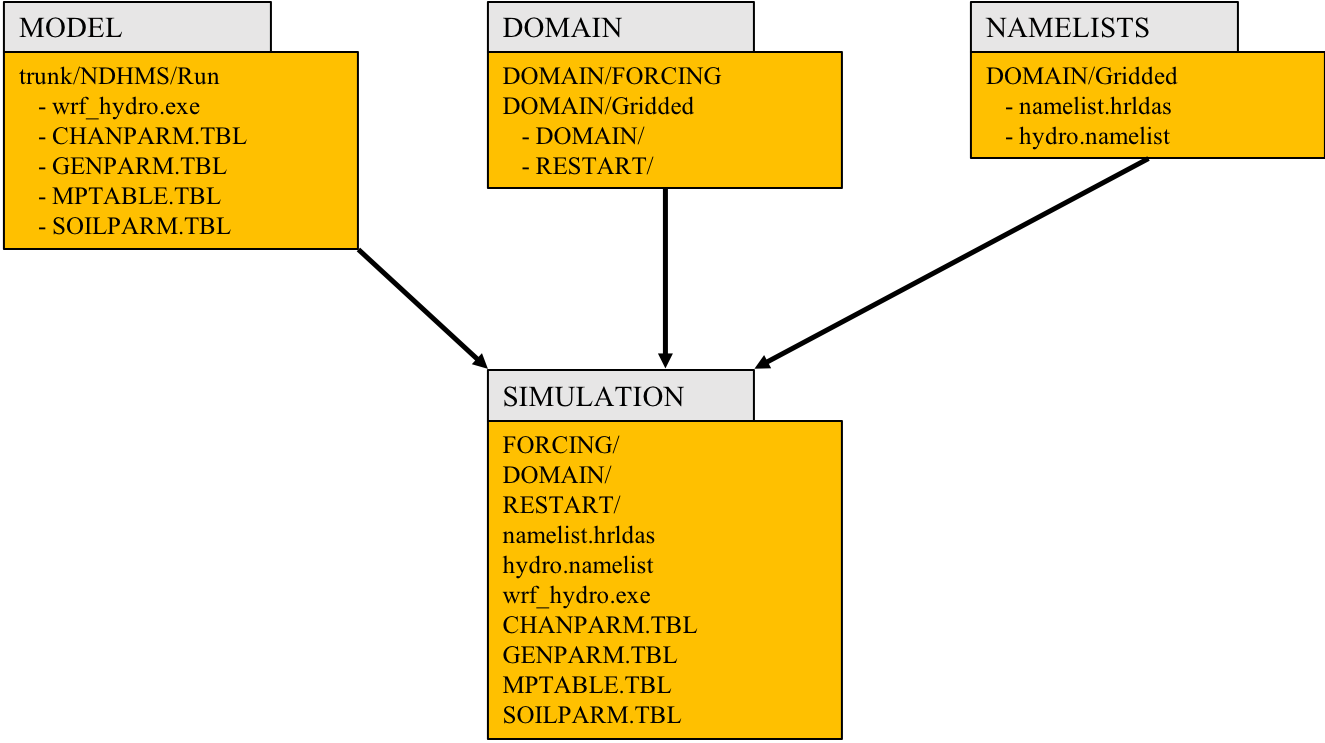

In the following steps, we will construct our simulation directory.

**Step 1. Create simulation directory**

We will create a directory for our simulation

In [28]:
%%bash
mkdir -p ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
ls ~/mount/wrf-hydro-training/output/lesson2/

run_gridded_default


**Step 2. Copy *model* files**

We will copy the required *model* files from the `~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run` directory. These files are small so we will make actual copies rather than symbolic links in this case.

In [29]:
%%bash
cp ~/mount/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/*.TBL ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
cp ~/mount/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/wrf_hydro.exe ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
ls ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default

201108260000.LDASOUT_DOMAIN1
201108260100.CHANOBS_DOMAIN1
201108260100.CHRTOUT_DOMAIN1
201108260100.CHRTOUT_GRID1
201108260100.GWOUT_DOMAIN1
201108260100.LAKEOUT_DOMAIN1
201108260100.LDASOUT_DOMAIN1
201108260100.LSMOUT_DOMAIN
201108260100.RTOUT_DOMAIN1
201108260200.CHANOBS_DOMAIN1
201108260200.CHRTOUT_DOMAIN1
201108260200.CHRTOUT_GRID1
201108260200.GWOUT_DOMAIN1
201108260200.LAKEOUT_DOMAIN1
201108260200.LDASOUT_DOMAIN1
201108260200.LSMOUT_DOMAIN
201108260300.CHANOBS_DOMAIN1
201108260300.CHRTOUT_DOMAIN1
201108260300.CHRTOUT_GRID1
201108260300.GWOUT_DOMAIN1
201108260300.LAKEOUT_DOMAIN1
201108260300.LDASOUT_DOMAIN1
201108260300.LSMOUT_DOMAIN
201108260400.CHANOBS_DOMAIN1
201108260400.CHRTOUT_DOMAIN1
201108260400.CHRTOUT_GRID1
201108260400.GWOUT_DOMAIN1
201108260400.LAKEOUT_DOMAIN1
201108260400.LDASOUT_DOMAIN1
201108260400.LSMOUT_DOMAIN
201108260400.RTOUT_DOMAIN1
201108260500.CHANOBS_DOMAIN1
201108260500.CHRTOUT_DOMAIN1
201108260500.CHRTOUT_GRID1
201108260500.GWOUT_DOMAIN1
201108260500.LAKE

**Step 3. Copy *DOMAIN* files**

We will copy the required *domain* files from the `~/wrf-hydro-training/DOMAIN/Gridded` directory. These files can be large so we will make symbolic links rather than copying the actual files. **NOTE: Because we are using symbolic links, the paths MUST be absolute and can't use ~**

In [30]:
%%bash
cp -as $HOME/mount/wrf-hydro-training/DOMAIN/FORCING ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
cp -as $HOME/mount/wrf-hydro-training/DOMAIN/Gridded/DOMAIN ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
cp -as $HOME/mount/wrf-hydro-training/DOMAIN/Gridded/RESTART ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
ls ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default

201108260000.LDASOUT_DOMAIN1
201108260100.CHANOBS_DOMAIN1
201108260100.CHRTOUT_DOMAIN1
201108260100.CHRTOUT_GRID1
201108260100.GWOUT_DOMAIN1
201108260100.LAKEOUT_DOMAIN1
201108260100.LDASOUT_DOMAIN1
201108260100.LSMOUT_DOMAIN
201108260100.RTOUT_DOMAIN1
201108260200.CHANOBS_DOMAIN1
201108260200.CHRTOUT_DOMAIN1
201108260200.CHRTOUT_GRID1
201108260200.GWOUT_DOMAIN1
201108260200.LAKEOUT_DOMAIN1
201108260200.LDASOUT_DOMAIN1
201108260200.LSMOUT_DOMAIN
201108260300.CHANOBS_DOMAIN1
201108260300.CHRTOUT_DOMAIN1
201108260300.CHRTOUT_GRID1
201108260300.GWOUT_DOMAIN1
201108260300.LAKEOUT_DOMAIN1
201108260300.LDASOUT_DOMAIN1
201108260300.LSMOUT_DOMAIN
201108260400.CHANOBS_DOMAIN1
201108260400.CHRTOUT_DOMAIN1
201108260400.CHRTOUT_GRID1
201108260400.GWOUT_DOMAIN1
201108260400.LAKEOUT_DOMAIN1
201108260400.LDASOUT_DOMAIN1
201108260400.LSMOUT_DOMAIN
201108260400.RTOUT_DOMAIN1
201108260500.CHANOBS_DOMAIN1
201108260500.CHRTOUT_DOMAIN1
201108260500.CHRTOUT_GRID1
201108260500.GWOUT_DOMAIN1
201108260500.LAKE

cp: '/home/docker/mount/wrf-hydro-training/DOMAIN/FORCING/2011082600.LDASIN_DOMAIN1' and '/home/docker/mount/wrf-hydro-training/output/lesson2/run_gridded_default/FORCING/2011082600.LDASIN_DOMAIN1' are the same file
cp: '/home/docker/mount/wrf-hydro-training/DOMAIN/FORCING/2011082601.LDASIN_DOMAIN1' and '/home/docker/mount/wrf-hydro-training/output/lesson2/run_gridded_default/FORCING/2011082601.LDASIN_DOMAIN1' are the same file
cp: '/home/docker/mount/wrf-hydro-training/DOMAIN/FORCING/2011082602.LDASIN_DOMAIN1' and '/home/docker/mount/wrf-hydro-training/output/lesson2/run_gridded_default/FORCING/2011082602.LDASIN_DOMAIN1' are the same file
cp: '/home/docker/mount/wrf-hydro-training/DOMAIN/FORCING/2011082603.LDASIN_DOMAIN1' and '/home/docker/mount/wrf-hydro-training/output/lesson2/run_gridded_default/FORCING/2011082603.LDASIN_DOMAIN1' are the same file
cp: '/home/docker/mount/wrf-hydro-training/DOMAIN/FORCING/2011082604.LDASIN_DOMAIN1' and '/home/docker/mount/wrf-hydro-training/output/l

**Step 4. Copy *namelist* files**

Because we are using the default prepared namelists from the example WRF-Hydro domain, we will copy those in as well. If you were using your own namelists, they would likely be edited and copied from elsewhere. These are simple text files so we will make actual copies rather than symbolic links.

In [31]:
%%bash
cp ~/mount/wrf-hydro-training/DOMAIN/Gridded/namelist.hrldas ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
cp ~/mount/wrf-hydro-training/DOMAIN/Gridded/hydro.namelist ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default
ls ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default | tail -40

201109012300.LAKEOUT_DOMAIN1
201109012300.LDASOUT_DOMAIN1
201109012300.LSMOUT_DOMAIN
201109020000.CHANOBS_DOMAIN1
201109020000.CHRTOUT_DOMAIN1
201109020000.CHRTOUT_GRID1
201109020000.GWOUT_DOMAIN1
201109020000.LAKEOUT_DOMAIN1
201109020000.LDASOUT_DOMAIN1
201109020000.LSMOUT_DOMAIN
CHANPARM.TBL
DOMAIN
FORCING
GENPARM.TBL
HYDRO.TBL
HYDRO_RST.2011-08-27_00:00_DOMAIN1
HYDRO_RST.2011-08-28_00:00_DOMAIN1
HYDRO_RST.2011-08-29_00:00_DOMAIN1
HYDRO_RST.2011-08-30_00:00_DOMAIN1
HYDRO_RST.2011-08-31_00:00_DOMAIN1
HYDRO_RST.2011-09-01_00:00_DOMAIN1
HYDRO_RST.2011-09-02_00:00_DOMAIN1
MPTABLE.TBL
RESTART
RESTART.2011082700_DOMAIN1
RESTART.2011082800_DOMAIN1
RESTART.2011082900_DOMAIN1
RESTART.2011083000_DOMAIN1
RESTART.2011083100_DOMAIN1
RESTART.2011090100_DOMAIN1
RESTART.2011090200_DOMAIN1
SOILPARM.TBL
diag_hydro.00000
diag_hydro.00001
diag_hydro.00002
diag_hydro.00003
hydro.namelist
namelist.hrldas
run.log
wrf_hydro.exe


We have now constructed our simulation directory with all the requisite files. In the next section we will run the simulation using mpi. 

## Running WRF-Hydro using default run-time options
Now that we have constructed our simulation directory, we can run our simulation. For this we will be using the `mpi run` command, which has a number of arguments. For this simple case, we only need to supply one argument, the number of cores. This is done with the `-np` argument, and we will set it to 4 cores. 

Because running a simulation can generate a lot of standard output, we will pipe the output to a log file.

In [32]:
%%bash
cd ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default; mpirun -np 4 ./wrf_hydro.exe >> run.log 2>&1

If your simulation ran successfully, there should now be a large number of output files in the `~/mount/wrf-hydro-training/output/lesson2/run_gridded_default`. We will cover what each of these files are in more depth in Lesson 4. Additionally, detailed descriptions of the output files can be found in the [Technical Description](). 

List the contents of the `~/mount/wrf-hydro-training/output/lesson2/run_gridded_default` directory.

In [33]:
ls ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default | tail -40

201109012300.LAKEOUT_DOMAIN1
201109012300.LDASOUT_DOMAIN1
201109012300.LSMOUT_DOMAIN
201109020000.CHANOBS_DOMAIN1
201109020000.CHRTOUT_DOMAIN1
201109020000.CHRTOUT_GRID1
201109020000.GWOUT_DOMAIN1
201109020000.LAKEOUT_DOMAIN1
201109020000.LDASOUT_DOMAIN1
201109020000.LSMOUT_DOMAIN
CHANPARM.TBL
DOMAIN/
FORCING/
GENPARM.TBL
HYDRO.TBL
HYDRO_RST.2011-08-27_00:00_DOMAIN1
HYDRO_RST.2011-08-28_00:00_DOMAIN1
HYDRO_RST.2011-08-29_00:00_DOMAIN1
HYDRO_RST.2011-08-30_00:00_DOMAIN1
HYDRO_RST.2011-08-31_00:00_DOMAIN1
HYDRO_RST.2011-09-01_00:00_DOMAIN1
HYDRO_RST.2011-09-02_00:00_DOMAIN1
MPTABLE.TBL
RESTART/
RESTART.2011082700_DOMAIN1
RESTART.2011082800_DOMAIN1
RESTART.2011082900_DOMAIN1
RESTART.2011083000_DOMAIN1
RESTART.2011083100_DOMAIN1
RESTART.2011090100_DOMAIN1
RESTART.2011090200_DOMAIN1
SOILPARM.TBL
diag_hydro.00000
diag_hydro.00001
diag_hydro.00002
diag_hydro.00003
hydro.namelist*
namelist.hrldas*
run.log
wrf_hydro.exe*


There are also four important files for determining the success or failure of the run, diag_hydro.0000\*. The number of diag files is equal to the number of cores used for the run. These diag_hydro.0000\* files contain logs and diagnostics on the simulation run. Since we ran using 4 cores, we have 4 diag_hydro.0000\* files.

You can check that your simulation ran successfully by examining the last line of the diag files, which should read  `The model finished successfully........`

In [34]:
%%bash
tail -1 ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default/diag_hydro.00000

 The model finished successfully.......


# Next up - Basics of working with WRF-Hydro outputs
This concludes lesson 2. In the next lesson, we will **briefly** discuss working with some of the output files. The output files from WRF-Hydro are standard netCDF4 files, and thus there are many way to work with these data. In lesson 3 we will simply cover a few Python libraries and commands that we will need for later lessons in this tutorial. Lesson 3 is by no means a comprehensive guide to working with netCDF files. 